In [1]:
# Import Packages

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
ML_folder = 'C:\\Users\\devan\\Documents\\School\\Machine Learning and Predictive Analytics\\Final Project\\'

obj = pd.read_pickle(ML_folder + 'moonGen_scrape_2016_final')

hold_difs = pd.read_csv(ML_folder + 'HoldDiff.csv')
hold_difs['AvgDiff'] = (hold_difs['LH_Diff']+hold_difs['RH_Diff'])/2

In [3]:
# Review grade counts

grade_cnt = {}
for climbn in list(obj.keys()):
    grade = obj[climbn]['grade']
    grade_cnt[grade] = grade_cnt.get(grade,0) + 1
    
grade_cnt

{'6C+': 4617,
 '6C': 3836,
 '7A': 4045,
 '6B+': 10153,
 '7A+': 3074,
 '7C': 1061,
 '7B': 1551,
 '7B+': 1622,
 '8A': 181,
 '7C+': 389,
 '8B+': 24,
 '8A+': 51,
 '8B': 29,
 '6B': 9}

In [4]:
# Create dictionary of hold difficulty based on Hold Diff file

data_df = pd.DataFrame.from_dict(obj, orient='index')

dif_dict = {}
for index, row in hold_difs.iterrows():
    x = row['X_coord']
    y = row['Y_coord']
    xy = (x,y)
    lh_dif = row['LH_Diff']
    rh_dif = row['RH_Diff']
    min_dif = row[['LH_Diff', 'RH_Diff']].min()
    avg_dif = row['AvgDiff']
    max_dif = row[['LH_Diff', 'RH_Diff']].max()
    dif_dict[xy] = {}
    dif_dict[xy]['LH_Dif'] = lh_dif
    dif_dict[xy]['RH_Dif'] = rh_dif
    dif_dict[xy]['Min_Dif'] = min_dif
    dif_dict[xy]['Avg_Dif'] = avg_dif
    dif_dict[xy]['Max_Dif'] = max_dif
    
# Check for missing hold values between source data and all data

missing_pos = {}
for index, row in data_df.iterrows():
    start = row['start']
    mid = row['mid']
    end = row['end']
    
    for pos in start:
        pos_tup = tuple(pos)
        if pos_tup not in dif_dict:
            missing_pos.setdefault(pos_tup, 0)
            missing_pos[pos_tup] = missing_pos[pos_tup] + 1
            
    for pos in mid:
        pos_tup = tuple(pos)
        if pos_tup not in dif_dict:
            missing_pos.setdefault(pos_tup, 0)
            missing_pos[pos_tup] = missing_pos[pos_tup] + 1  
        
    for pos in end:
        pos_tup = tuple(pos)
        if pos_tup not in dif_dict:
            missing_pos.setdefault(pos_tup, 0)
            missing_pos[pos_tup] = missing_pos[pos_tup] + 1
            
# Fill in missing hold location difficulty
           
x = int(0)
y = int(5)
xy = (x,y)
dif_dict[xy] = {}
dif_dict[xy]['LH_Dif'] = 2
dif_dict[xy]['RH_Dif'] = 2
dif_dict[xy]['Min_Dif'] = 2
dif_dict[xy]['Avg_Dif'] = 2
dif_dict[xy]['Max_Dif'] = 2

In [5]:
# get difficulty for start, middle, end, and full sequence into dataframe
# construct additional data features

results = []

for index, row in data_df.iterrows():
    start = row['start']
    mid = row['mid']
    end = row['end']
    full = start + mid + end
    total_holds = len(full)
    
    start_dif = {}
    for pos in start:
        pos_tup = tuple(pos)
        lh_dif = dif_dict[pos_tup]['LH_Dif']
        rh_dif = dif_dict[pos_tup]['RH_Dif']
        min_dif = dif_dict[pos_tup]['Min_Dif']
        avg_dif = dif_dict[pos_tup]['Avg_Dif']
        max_dif = dif_dict[pos_tup]['Max_Dif']
        start_dif.setdefault('lh_dif', []).append(lh_dif)
        start_dif.setdefault('rh_dif', []).append(rh_dif)
        start_dif.setdefault('min_dif', []).append(min_dif)
        start_dif.setdefault('avg_dif', []).append(avg_dif)
        start_dif.setdefault('max_dif', []).append(max_dif)
        
    start_min_dif = np.average(start_dif['min_dif'])
    start_avg_dif = np.average(start_dif['avg_dif'])
    start_max_dif = np.average(start_dif['max_dif'])

  
    mid_dif = {}
    for pos in mid:
        pos_tup = tuple(pos)
        lh_dif = dif_dict[pos_tup]['LH_Dif']
        rh_dif = dif_dict[pos_tup]['RH_Dif']
        min_dif = dif_dict[pos_tup]['Min_Dif']
        avg_dif = dif_dict[pos_tup]['Avg_Dif']
        max_dif = dif_dict[pos_tup]['Max_Dif']
        mid_dif.setdefault('lh_dif', []).append(lh_dif)
        mid_dif.setdefault('rh_dif', []).append(rh_dif)
        mid_dif.setdefault('min_dif', []).append(min_dif)
        mid_dif.setdefault('avg_dif', []).append(avg_dif)
        mid_dif.setdefault('max_dif', []).append(max_dif)
        
    mid_min_dif = np.average(mid_dif['min_dif'])
    mid_avg_dif = np.average(mid_dif['avg_dif'])
    mid_max_dif = np.average(mid_dif['max_dif'])

    end_dif = {}
    for pos in end:
        pos_tup = tuple(pos)
        lh_dif = dif_dict[pos_tup]['LH_Dif']
        rh_dif = dif_dict[pos_tup]['RH_Dif']
        min_dif = dif_dict[pos_tup]['Min_Dif']
        avg_dif = dif_dict[pos_tup]['Avg_Dif']
        max_dif = dif_dict[pos_tup]['Max_Dif']
        end_dif.setdefault('lh_dif', []).append(lh_dif)
        end_dif.setdefault('rh_dif', []).append(rh_dif)
        end_dif.setdefault('min_dif', []).append(min_dif)
        end_dif.setdefault('avg_dif', []).append(avg_dif)
        end_dif.setdefault('max_dif', []).append(max_dif)
        
    end_min_dif = np.average(end_dif['min_dif'])
    end_avg_dif = np.average(end_dif['avg_dif'])
    end_max_dif = np.average(end_dif['max_dif'])
    
    full_dif = {}
    min_x = None
    max_x = None
    min_y = None
    ys = []
    
    for pos in full:
        if min_x == None:
            min_x = pos[0]
        if pos[0] < min_x:
            min_x = pos[0]

        if max_x == None:
            max_x = pos[0]
        if pos[0] > max_x:
            max_x = pos[0]

        if min_y == None:
            min_y = pos[1]
        if pos[1] < min_y:
            min_y = pos[1]

        ys.append(pos[1])
        
        pos_tup = tuple(pos)
        lh_dif = dif_dict[pos_tup]['LH_Dif']
        rh_dif = dif_dict[pos_tup]['RH_Dif']
        min_dif = dif_dict[pos_tup]['Min_Dif']
        avg_dif = dif_dict[pos_tup]['Avg_Dif']
        max_dif = dif_dict[pos_tup]['Max_Dif']
        full_dif.setdefault('lh_dif', []).append(lh_dif)
        full_dif.setdefault('rh_dif', []).append(rh_dif)
        full_dif.setdefault('min_dif', []).append(min_dif)
        full_dif.setdefault('avg_dif', []).append(avg_dif)
        full_dif.setdefault('max_dif', []).append(max_dif)
        
    full_min_dif = np.average(full_dif['min_dif'])
    full_avg_dif = np.average(full_dif['avg_dif'])
    full_max_dif = np.average(full_dif['max_dif'])
    global_min_dif = min(full_dif['min_dif'])
    global_max_dif = max(full_dif['max_dif'])
    avg_y = np.average(ys)
    
    new_data = [
        index,
        start_dif,
        start_min_dif,
        start_avg_dif,
        start_max_dif,
        mid_dif,
        mid_min_dif,
        mid_avg_dif,
        mid_max_dif,
        end_dif,
        end_min_dif,
        end_avg_dif,
        end_max_dif,
        full,
        full_dif,
        full_min_dif,
        full_avg_dif,
        full_max_dif,
        total_holds,
        global_min_dif,
        global_max_dif,
        min_x,
        max_x,
        min_y,
        avg_y
        ]

    results.append(new_data)
    
col_names = [
    'row_id',
    'start_dif',
    'start_min_dif',
    'start_avg_dif',
    'start_max_dif',
    'mid_dif',
    'mid_min_dif',
    'mid_avg_dif',
    'mid_max_dif',
    'end_dif',
    'end_min_dif',
    'end_avg_dif',
    'end_max_dif',
    'full',
    'full_dif',
    'full_min_dif',
    'full_avg_dif',
    'full_max_dif',
    'total_holds',
    'global_min_dif',
    'global_max_dif',
    'min_x',
    'max_x',
    'min_y',
    'avg_y'
    ]

results_df = pd.DataFrame(results, columns=col_names)
results_df.set_index('row_id', inplace=True)
data_df = data_df.join(results_df)


In [6]:
# Make grouped target classes and fold + into data as predictor feature

data_df['grade_adj'] = data_df['grade']

grade_change = {
    '6C+' : '6C',
    '6B+' : '6B',
    '7A+' : '7A',
    '7B+' : '7B',
    '7C+' : '7C',
    '8B+' : '8B',
    '8A+' : '8A'
    }

data_df['grade_adj'].replace(grade_change, inplace=True)
data_df['grade_adj'].value_counts()

data_df['plus_dif'] = data_df['grade'] != data_df['grade_adj']
data_df['plus_dif'].replace({True: 1, False: 0}, inplace=True)

grade_change_2 = {'8A': '8+',
                  '8B': '8+'}

data_df['grade_adj'].replace(grade_change_2, inplace=True)

In [7]:
# Create distance data features

from scipy.spatial import distance

dist_results = []
for index, row in data_df.iterrows():
    start = row['start']
    mid = row['mid']
    end = row['end']
    
    start_dist = []
    for hold in start:
        hold_dist = distance.euclidean(hold, mid[0])
        start_dist.append(hold_dist)
    
    mid_dist = []
    for i in range(len(mid)-1):
        cur_hold = mid[i]
        next_hold = mid[i+1]
        hold_dist = distance.euclidean(cur_hold, next_hold)
        mid_dist.append(hold_dist)
        
    end_dist = []
    for hold in end:
        hold_dist = distance.euclidean(mid[-1], hold)
        end_dist.append(hold_dist)
        
    full_dist = start_dist + mid_dist + end_dist
    
    start_min_dist = min(start_dist)
    end_min_dist = min(end_dist)
    min_dist = min(full_dist)
    avg_dist = np.average(full_dist)
    max_dist = max(full_dist)
    
    new_data = [
        index,
        start_min_dist,
        end_min_dist,
        min_dist,
        avg_dist,
        max_dist
        ]
    
    dist_results.append(new_data)
    
col_names = [
    'row_id',
    'start_min_dist',
    'end_min_dist',
    'min_dist',
    'avg_dist',
    'max_dist'    
    ]

dist_results_df = pd.DataFrame(dist_results, columns=col_names)
dist_results_df.set_index('row_id', inplace=True)
data_df = data_df.join(dist_results_df)

<AxesSubplot:xlabel='total_holds', ylabel='Count'>

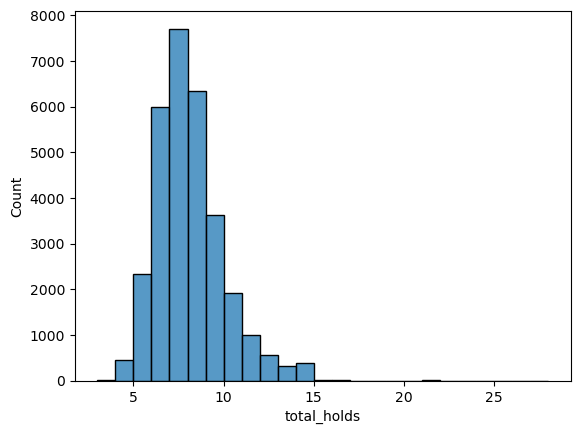

In [8]:
%matplotlib inline

# Additional review of number of holds, grades, and hold difficulty

sns.histplot(data=data_df, x='total_holds', binwidth=1)

[Text(0.5, 0, ''), Text(0, 0.5, '')]

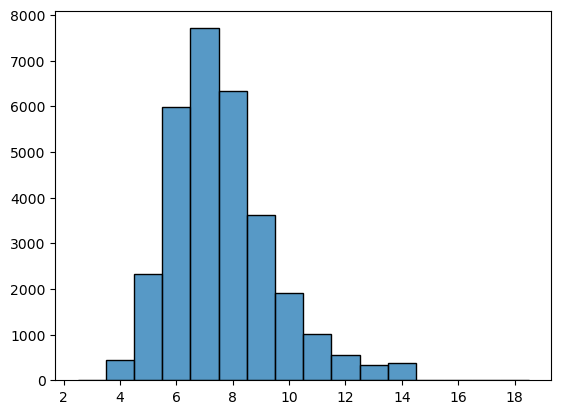

In [9]:
data_df = data_df[data_df['total_holds']<20]

sns.histplot(data=data_df, x='total_holds', discrete=True).set(xlabel=None, ylabel=None)

<AxesSubplot:xlabel='grade_adj', ylabel='Count'>

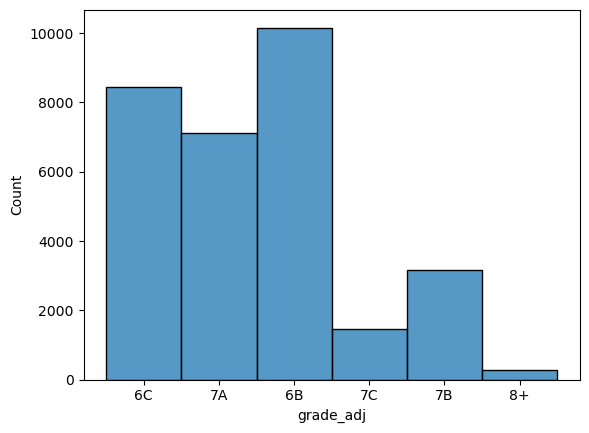

In [10]:
sns.histplot(data=data_df, x='grade_adj', discrete=True)

<AxesSubplot:xlabel='full_avg_dif', ylabel='Count'>

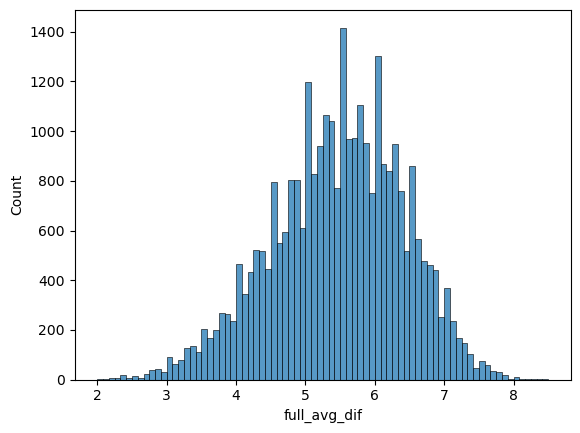

In [11]:
sns.histplot(data=data_df, x='full_avg_dif')

<AxesSubplot:xlabel='avg_dist', ylabel='Count'>

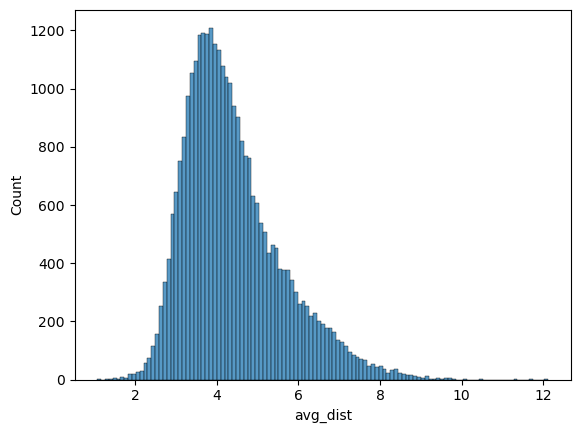

In [12]:
sns.histplot(data=data_df, x='avg_dist')

[Text(0.5, 0, ''), Text(0, 0.5, 'Avg Hold Distance')]

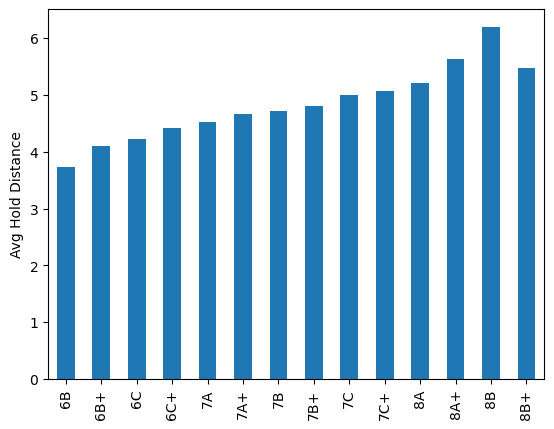

In [13]:
data_df.groupby('grade')['avg_dist'].mean().plot.bar().set(xlabel=None, ylabel='Avg Hold Distance')

[Text(0.5, 0, ''), Text(0, 0.5, 'Avg Number of Holds')]

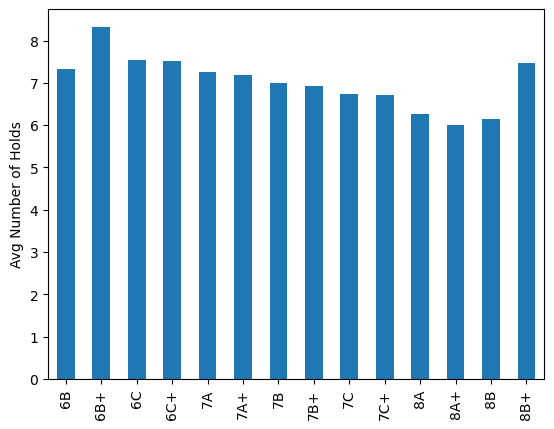

In [14]:
data_df.groupby('grade')['total_holds'].mean().plot.bar().set(xlabel=None, ylabel='Avg Number of Holds')

In [15]:
# Set up X, Y, and test/train splits

vars_of_interest = ['repeats','start_min_dif','start_avg_dif','start_max_dif',
                    'mid_min_dif', 'mid_avg_dif', 'mid_max_dif', 'end_min_dif',
                    'end_avg_dif','end_max_dif','full_min_dif','full_avg_dif',
                    'full_max_dif','total_holds','global_min_dif','global_max_dif',
                    'min_x','max_x','min_y','avg_y','start_min_dist','end_min_dist',
                    'min_dist','avg_dist','max_dist','plus_dif']

X = data_df[vars_of_interest]
Y = data_df['grade_adj']

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [16]:
# DNN Creation and class weighting

classifier = keras.models.Sequential([
    tf.keras.layers.Dense(units=26, input_dim=26),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(6, activation='softmax')
    ])


optimizer = keras.optimizers.Adam(learning_rate=0.001)


classifier.compile(optimizer=optimizer, 
                   loss='categorical_crossentropy',
                   metrics='accuracy')

encoder.classes_
y_train_classes = Y_train.argmax(axis=1)
y_train_act = encoder.inverse_transform(y_train_classes)
np.unique(y_train_act, return_counts=True)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes = np.unique(y_train_classes), 
                                                  y=y_train_classes)
class_weighting = {}
for i in range(len(class_weights)):
    class_weighting[i] = class_weights[i]
    
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 24)                648       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                336       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [17]:
# Set up learn rate scheduler and fit model

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4)

dnn_history = classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=100, 
                         validation_split=0.10, class_weight=class_weighting,
                         callbacks=[lr_scheduler, keras.callbacks.EarlyStopping(patience=8)])

Epoch 1/100
776/776 [==============================] - 3s 3ms/step - loss: 1.5915 - accuracy: 0.3470 - val_loss: 1.2965 - val_accuracy: 0.4634 - lr: 0.0010
Epoch 2/100
776/776 [==============================] - 2s 2ms/step - loss: 1.3938 - accuracy: 0.4609 - val_loss: 1.1966 - val_accuracy: 0.5007 - lr: 0.0010
Epoch 3/100
776/776 [==============================] - 2s 3ms/step - loss: 1.3487 - accuracy: 0.4875 - val_loss: 1.1808 - val_accuracy: 0.5163 - lr: 0.0010
Epoch 4/100
776/776 [==============================] - 2s 3ms/step - loss: 1.3197 - accuracy: 0.4977 - val_loss: 1.1488 - val_accuracy: 0.5355 - lr: 0.0010
Epoch 5/100
776/776 [==============================] - 2s 3ms/step - loss: 1.2926 - accuracy: 0.5054 - val_loss: 1.1411 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 6/100
776/776 [==============================] - 2s 3ms/step - loss: 1.2876 - accuracy: 0.5151 - val_loss: 1.1417 - val_accuracy: 0.5341 - lr: 0.0010
Epoch 7/100
776/776 [==============================] - 2s 3ms/st

In [18]:
# Evaluate model

classifier.evaluate(x=X_test, y=Y_test, batch_size=32)

96/96 [==============================] - 0s 2ms/step - loss: 1.0281 - accuracy: 0.5620


[1.028122901916504, 0.5620104670524597]

In [19]:
# Generate confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

predictions = classifier.predict(X_test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = Y_test.argmax(axis=1)
class_labels = list(encoder.classes_)
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

96/96 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          6B       0.77      0.87      0.82      1015
          6C       0.58      0.49      0.53       846
          7A       0.51      0.38      0.43       716
          7B       0.27      0.31      0.29       321
          7C       0.23      0.36      0.28       138
          8+       0.11      0.43      0.18        28

    accuracy                           0.56      3064
   macro avg       0.41      0.47      0.42      3064
weighted avg       0.57      0.56      0.56      3064



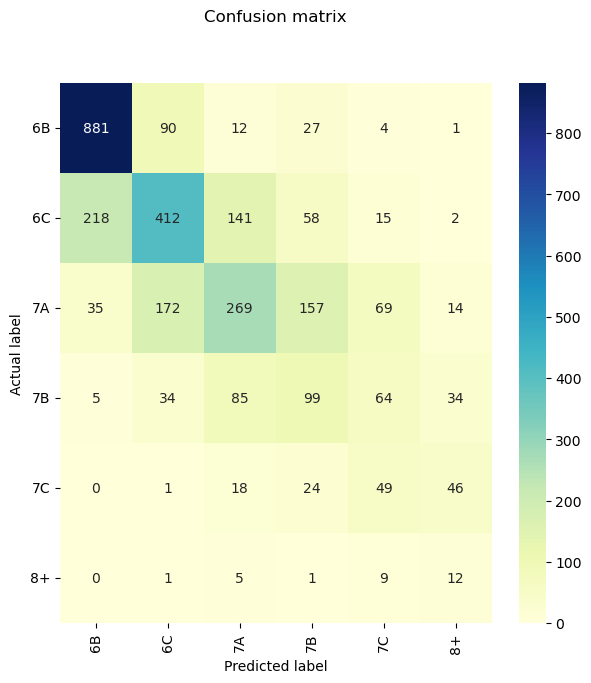

In [20]:
def CMPlot(y_actual, y_predicted, class_names):
    fig, ax = plt.subplots(figsize=(6,6))
    tick_marks = np.arange(len(class_names))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_actual,y_predicted)), annot=True, cmap="YlGnBu" ,fmt='g')
    #ax.xaxis.set_label_position("middle")
    plt.xticks(tick_marks+0.5, labels=class_names, rotation='vertical')
    plt.yticks(tick_marks+0.5, labels=class_names, rotation='horizontal')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show
    
CMPlot(true_classes, predicted_classes,class_labels)

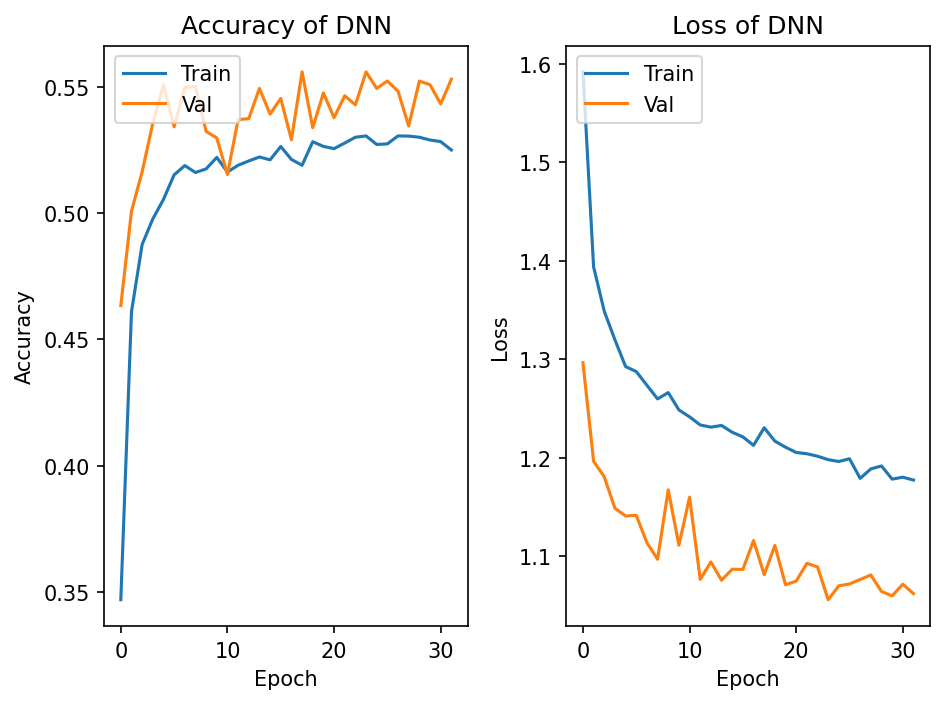

In [21]:
# Generate plot of model training history

def plot_history(history, model_name):
    """
    Plot the training history of the model
    """
    # Plot training & validation accuracy values
    acc = []
    val_acc = []
    loss = []
    val_loss = []
    history = history
    acc.append(history.history['accuracy'])
    val_acc.append(history.history['val_accuracy'])
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

    acc = sum(acc, [])
    val_acc = sum(val_acc, [])
    loss = sum(loss, [])
    val_loss = sum(val_loss, [])

    fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
    axes[0].plot(acc)
    axes[0].plot(val_acc)
    axes[0].set_title('Accuracy of '+ model_name)
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper left')

    axes[1].plot(loss)
    axes[1].plot(val_loss)
    axes[1].set_title('Loss of ' + model_name)
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')
    plt.tight_layout()
    
    history_package = {'acc': acc, 
                       'val_acc': val_acc, 
                       'loss': loss, 
                       'val_loss': val_loss}
    return history_package

plot_hist = plot_history(dnn_history, "DNN")